<a href="https://colab.research.google.com/github/akhileshyadav12/pythonproject/blob/master/TransferLearining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from keras.applications.inception_v3 import decode_predictions

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
device_name = tf.test.gpu_device_name()
if not tf.test.is_gpu_available():
  pass
  #raise SystemError('GPU device not found')
else:print('Found GPU at: {}'.format(device_name))

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [6]:
model=keras.applications.inception_v3.InceptionV3()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
96116736/96112376 [==============================] - 3s 0us/step


In [7]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
model.layers.pop()
a=model.layers[-2].output
feature_model=Model(inputs=model.inputs, outputs=a,name="assignment_1_feature_exract")
a=Dense(4,activation="softmax",name="New_output")(a)
pred_model = Model(inputs=model.inputs, outputs=a,name="assignment_1")
# get extracted features
#features = model.predict(image)

In [0]:
for layer in pred_model.layers[:-1]:
    layer.trainable=False

In [11]:
pred_model.layers[-1].trainable

True

In [12]:
feature_model.summary()

Model: "assignment_1_feature_exract"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________

In [86]:
from google.colab import files
uploaded=files.upload()
a=[i for i in uploaded]



Saving img031.jpg to img031 (1).jpg
Saving img032.jpg to img032 (1).jpg
Saving img033.jpg to img033 (1).jpg
Saving img034.jpg to img034 (1).jpg
Saving img035.jpg to img035 (1).jpg
Saving img036.jpg to img036 (1).jpg
Saving img037.jpg to img037 (1).jpg
Saving img038.jpg to img038 (1).jpg
Saving img039.jpg to img039 (1).jpg
Saving img040.jpg to img040 (1).jpg
Saving img041.jpg to img041 (1).jpg
Saving img042.jpg to img042 (1).jpg
Saving img043.jpg to img043 (1).jpg
Saving img044.jpg to img044 (1).jpg
Saving img045.jpg to img045 (1).jpg
Saving img046.jpg to img046 (1).jpg
Saving img047.jpg to img047 (1).jpg
Saving img048.jpg to img048 (1).jpg
Saving img049.jpg to img049 (1).jpg
Saving img050.jpg to img050 (1).jpg


In [0]:

img=keras.preprocessing.image.load_img(a[0],target_size=(299,299,3))

In [0]:
img=np.array(img)

In [89]:
img.shape

(299, 299, 3)

In [0]:
feature=feature_model.predict(img.reshape(-1,299,299,3))

In [91]:
feature.shape

(1, 2048)

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

vgg = VGG16(weights='imagenet', include_top=False)

img = image.load_img(a[0], target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
vggf = vgg.predict(x)


In [98]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np

res = ResNet50(weights='imagenet', include_top=False)

img = image.load_img(a[0], target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
resf = res.predict(x)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


In [102]:
resf.shape

(1, 7, 7, 2048)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


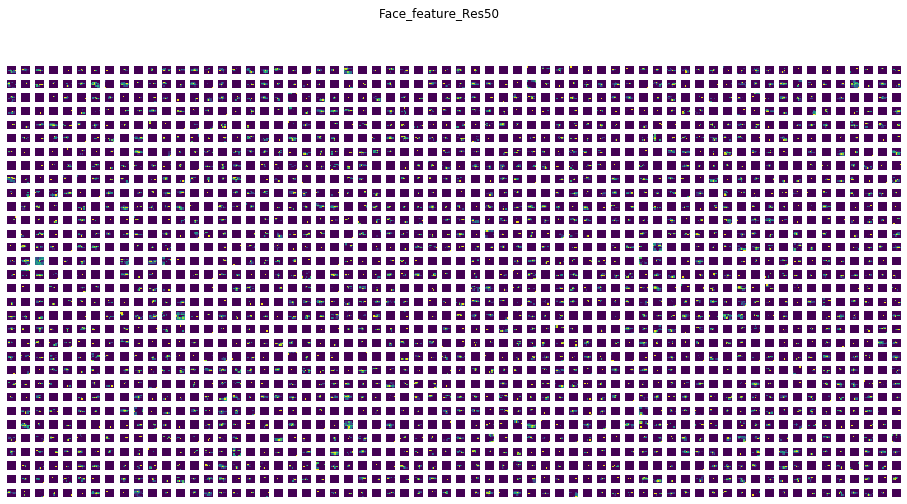

In [119]:
fig,axs=plt.subplots(32,64,gridspec_kw = {'wspace':0.7, 'hspace':0.1},figsize=(16,8))
plt.tight_layout()
fig.suptitle("Face_feature_Res50")
#ax.set_title("Face_feature_vgg16")
for i,ax in enumerate(axs.flatten()):
  ax.axis('off')

  ax.imshow(resf[0,:,:,i]);
  ax.set_xticklabels([])
  ax.set_yticklabels([])
plt.savefig("extracted_feature_face_res.png",dpi=1000)

In [0]:
files.download("extracted_feature_face_res.png")

In [51]:
vggf[0,:,:,:].shape

(7, 7, 512)